In [1]:
#importing libraries
import pandas as pd
import plotly.express as px
from sodapy import Socrata
import geopandas as gpd

In [2]:
#importing data
ces = pd.read_csv('Data/CES/ces3results.csv')
hpi = pd.read_csv('Data/HPI_LA.csv')

In [3]:
ces.sample()

CensusTract  TotalPopulation CaliforniaCounty    ZIP  \
3368   6037480804             4998      Los Angeles  91801   

     NearbyCity_(to help approximate location only)   Longitude  Latitude  \
3368                                       Alhambra -118.147241  34.09572   

      CES3.0_Score  CES3.0_pctl CES3.0_pctl_range  ...  \
3368         28.84        57.52            55-60%  ...   

     LinguisticIsolation_pctl  Poverty  Poverty_pctl  Unemployment  \
3368                    78.58     31.3         46.83           8.3   

      Unemployment_pctl  HousingBurden  HousingBurden_pctl  PopChar  \
3368              41.43           18.0               50.33    42.38   

      PopChar_Score  PopChar_pctl  
3368            4.4         38.18  

[1 rows x 57 columns]

In [4]:
hpi.sample()

CensusTract Neighborhood  pop2010  pct2010gq         City    ZIP  \
28   6037104610          NaN     3672        0.1  Los Angeles  91331   

    County_FIPS  County_Name   UrbanType  hpi2score  ...  LEB_pctile  \
28         6037  Los Angeles  urban_area   -0.56514  ...   87.360452   

    white_pct black_pct  asian_pct  latino_pct  multiple_pct  NativeAm_pct  \
28   1.361656  0.354031   0.326797   97.331155      0.245098      0.163399   

    PacificIsl_pct  other_pct     version  
28        0.136166   0.081699  Wed13Dec17  

[1 rows x 92 columns]

In [5]:
#cleaning
ces = pd.read_csv(
    'Data/CES/ces3results.csv',
    dtype=
    {
        'CensusTract':str,
    }
)
ces.sample()

CensusTract  TotalPopulation CaliforniaCounty    ZIP  \
7743  06001404502             5784         Alameda   94611   

     NearbyCity_(to help approximate location only)   Longitude   Latitude  \
7743                                        Oakland -122.202615  37.834526   

      CES3.0_Score  CES3.0_pctl     CES3.0_pctl_range  ...  \
7743          4.32         2.35  1-5% (lowest scores)  ...   

     LinguisticIsolation_pctl  Poverty  Poverty_pctl  Unemployment  \
7743                      0.0      5.3          1.22           3.9   

      Unemployment_pctl  HousingBurden  HousingBurden_pctl  PopChar  \
7743               5.98            6.9                4.38    13.97   

      PopChar_Score  PopChar_pctl  
7743           1.45          3.13  

[1 rows x 57 columns]

In [6]:
#cleaning
hpi = pd.read_csv(
      'Data/HPI_LA.csv',
      dtype=
      {
          'CensusTract':str,
      }
)
hpi.sample()

CensusTract Neighborhood  pop2010  pct2010gq         City    ZIP  \
389  06037187101          NaN     3235        0.3  Los Angeles  90039   

     County_FIPS  County_Name   UrbanType  hpi2score  ...  LEB_pctile  \
389         6037  Los Angeles  urban_area   0.138381  ...   91.569357   

     white_pct black_pct  asian_pct  latino_pct  multiple_pct  NativeAm_pct  \
389   26.33694  1.112828  24.265842   45.100464      2.503864      0.340031   

     PacificIsl_pct  other_pct     version  
389         0.15456   0.185471  Wed13Dec17  

[1 rows x 92 columns]

In [7]:
ces = ces[['CensusTract','TotalPopulation','Longitude','Latitude','PM2.5','PM2.5_Pctl','Poverty']]
ces.columns = ['censustract','total_pop','lon','lat','pm25','pm25_pctl','poverty']
ces.sample()

censustract  total_pop         lon        lat      pm25  pm25_pctl  \
7081  06073008312       3629 -117.252727  32.905383  9.536303      40.92   

      poverty  
7081     16.7

In [8]:
hpi = hpi[['CensusTract','City','income','income_pctile','parkaccess','parkaccess_pctile','treecanopy', 'treecanopy_pctile']]
hpi.columns = ['censustract','city','income','income_pctl','parkaccess','parkaccess_pctl','treecanopy', 'treecanopy_pctl']
hpi.sample()

censustract         city   income  income_pctl  parkaccess  \
971  06037296402  Los Angeles  82813.0    73.643013       100.0   

     parkaccess_pctl  treecanopy  treecanopy_pctl  
971        81.355062    7.045519        66.521237

In [9]:
#merging the two
df = ces.merge(hpi,on="censustract")
df.sample()

censustract  total_pop         lon        lat   pm25  pm25_pctl  poverty  \
91  06037229200       4394 -118.260828  33.998272  12.89      92.89     75.4   

           city   income  income_pctl  parkaccess  parkaccess_pctl  \
91  Los Angeles  20844.0     0.923906       100.0        81.355062   

    treecanopy  treecanopy_pctl  
91    3.261275        17.913512

In [10]:
#importing census data to get LA city tracts
race = gpd.read_file('Data/census/cr_race_tract.geojson')
race.sample()

geoid                                name  B03002001  \
161  14000US06037121900  Census Tract 1219, Los Angeles, CA     3657.0   

     B03002001, Error  B03002002  B03002002, Error  B03002003  \
161             345.0      878.0             186.0      626.0   

     B03002003, Error  B03002004  B03002004, Error  ...  B03002017, Error  \
161             211.0       80.0              67.0  ...              12.0   

     B03002018  B03002018, Error  B03002019  B03002019, Error  B03002020  \
161      546.0             247.0      161.0             154.0       66.0   

     B03002020, Error  B03002021  B03002021, Error  \
161              57.0       95.0             122.0   

                                              geometry  
161  MULTIPOLYGON (((-118.38778 34.22159, -118.3877...  

[1 rows x 45 columns]

In [11]:
#cleaning
race = gpd.read_file(
        'Data/census/cr_race_tract.geojson',
        dtype={
            'geoid':str
        }
)
race.sample()

geoid                                   name  B03002001  \
626  14000US06037214502  Census Tract 2145.02, Los Angeles, CA     5375.0   

     B03002001, Error  B03002002  B03002002, Error  B03002003  \
626             613.0     4939.0             658.0     2576.0   

     B03002003, Error  B03002004  B03002004, Error  ...  B03002017, Error  \
626             449.0      581.0             389.0  ...              17.0   

     B03002018  B03002018, Error  B03002019  B03002019, Error  B03002020  \
626      179.0             119.0        0.0              17.0        0.0   

     B03002020, Error  B03002021  B03002021, Error  \
626              17.0        0.0              17.0   

                                              geometry  
626  MULTIPOLYGON (((-118.35566 34.07011, -118.3556...  

[1 rows x 45 columns]

In [12]:
race['geoid'] = race['geoid'].str.replace('14000US','')
race.sample()

geoid                                name  B03002001  \
942  06037291300  Census Tract 2913, Los Angeles, CA     2873.0   

     B03002001, Error  B03002002  B03002002, Error  B03002003  \
942             172.0     2169.0             147.0      540.0   

     B03002003, Error  B03002004  B03002004, Error  ...  B03002017, Error  \
942             109.0      196.0             139.0  ...              38.0   

     B03002018  B03002018, Error  B03002019  B03002019, Error  B03002020  \
942      259.0             114.0       64.0              47.0       57.0   

     B03002020, Error  B03002021  B03002021, Error  \
942              47.0        7.0              14.0   

                                              geometry  
942  MULTIPOLYGON (((-118.30915 33.86086, -118.3091...  

[1 rows x 45 columns]

In [13]:
race = race[['geoid','B03002003','B03002004','B03002005','B03002006','B03002007','B03002008','B03002009','B03002012']]
race.columns = ['censustract','white','black','ami','asian','nhpi','other','multiracial','latinx']
race.sample()

censustract  white  black  ami   asian  nhpi  other  multiracial  latinx
555  06037208620  292.0  257.0  0.0  1384.0  74.0   20.0         62.0  2230.0

In [14]:
race.tail(5)

censustract      white     black     ami     asian    nhpi    other  \
1000     06037980026        8.0      10.0     0.0       0.0     0.0      0.0   
1001     06037980028        0.0       0.0     0.0       0.0     0.0      0.0   
1002     06037980031      399.0     222.0    12.0      40.0    10.0     11.0   
1003     06037990200        0.0       0.0     0.0       0.0     0.0      0.0   
1004  16000US0644000  1127314.0  340688.0  6091.0  455113.0  5754.0  14051.0   

      multiracial     latinx  
1000          6.0       13.0  
1001          0.0        0.0  
1002         56.0      363.0  
1003          0.0        0.0  
1004      87757.0  1922889.0

In [15]:
race=race.drop(1004)

In [16]:
race.tail()

censustract  white  black   ami  asian  nhpi  other  multiracial  latinx
999   06037980024  160.0   17.0  11.0   12.0   0.0    0.0          0.0    64.0
1000  06037980026    8.0   10.0   0.0    0.0   0.0    0.0          6.0    13.0
1001  06037980028    0.0    0.0   0.0    0.0   0.0    0.0          0.0     0.0
1002  06037980031  399.0  222.0  12.0   40.0  10.0   11.0         56.0   363.0
1003  06037990200    0.0    0.0   0.0    0.0   0.0    0.0          0.0     0.0

In [17]:
#merging
data = df.merge(race,on="censustract")
data.sample()

censustract  total_pop         lon        lat   pm25  pm25_pctl  poverty  \
263  06037104704       4219 -118.408864  34.262532  11.21      66.23     61.4   

            city   income  income_pctl  ...  treecanopy  treecanopy_pctl  \
263  Los Angeles  50346.0    35.031438  ...    5.142105        50.404209   

     white  black  ami  asian  nhpi  other  multiracial  latinx  
263  189.0  598.0  0.0  336.0   0.0    0.0         18.0  3190.0  

[1 rows x 22 columns]

In [18]:
#importing usc data
usc = pd.read_csv('Data/Censust_neighborhood.csv')
usc.sample()

GEOID                                              Tract  \
803  1400000US06037240500  Census Tract 2405, Los Angeles County, California   

     CensusTract  Tract Number         Neighborhood  \
803   6037240500        240500  Broadway-Manchester   

                      Location   Latitude   Longitude  
803  (33.9469185, -118.275892)  33.946919 -118.275892

In [19]:
#cleaning
usc = pd.read_csv('Data/Censust_neighborhood.csv',
        dtype={
            'CensusTract':str,
        }
)
usc.sample() 

GEOID                                              Tract  \
1523  1400000US06037530006  Census Tract 5300.06, Los Angeles County, Cali...   

      CensusTract  Tract Number Neighborhood                   Location  \
1523  06037530006        530006   Montebello  (34.0207055, -118.113921)   

       Latitude   Longitude  
1523  34.020705 -118.113921

In [20]:
usc = usc[['CensusTract','Neighborhood','Location']]
usc.columns = ['censustract','neighborhood','location']
usc.head()

censustract neighborhood                   location
0  06037101110      Tujunga  (34.2595555, -118.293602)
1  06037101122      Tujunga    (34.267357, -118.29024)
2  06037101210      Tujunga  (34.251998, -118.2926875)
3  06037101220      Tujunga  (34.2511895, -118.281014)
4  06037101300      Tujunga  (34.2455945, -118.271731)

In [21]:
#merging
hm = usc.merge(data,on='censustract')
hm.sample()

censustract neighborhood                  location  total_pop  \
108  06037115301   Northridge  (34.240482, -118.545339)       4156   

            lon        lat   pm25  pm25_pctl  poverty         city  ...  \
108 -118.548089  34.242285  10.37      52.61     27.1  Los Angeles  ...   

     treecanopy  treecanopy_pctl   white  black  ami   asian  nhpi  other  \
108    7.114251        67.073014  2278.0  304.0  2.0  1042.0   0.0   11.0   

     multiracial  latinx  
108         37.0   926.0  

[1 rows x 24 columns]

In [22]:
#imporing neighborhood map
latimes = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v3.geojson')
latimes = latimes[['name','geometry']]
latimes.columns = ['neighborhood','geometry']
latimes.sample()

neighborhood                                           geometry
29  Elysian Valley  MULTIPOLYGON (((-118.22801 34.08831, -118.2274...

In [23]:
#merging
ok = latimes.merge(hm,on="neighborhood")
ok.sample()

neighborhood                                           geometry  \
813     Van Nuys  MULTIPOLYGON (((-118.47303 34.22111, -118.4676...   

     censustract                  location  total_pop         lon        lat  \
813  06037128102  (34.190296, -118.444351)       4795 -118.444351  34.190296   

      pm25  pm25_pctl  poverty  ... treecanopy  treecanopy_pctl  white  black  \
813  11.21      66.23     55.2  ...   5.037731         49.08251  849.0  283.0   

     ami  asian  nhpi  other  multiracial  latinx  
813  0.0  365.0   0.0   43.0         31.0  3405.0  

[1 rows x 25 columns]

In [24]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

# adding contextility to add a basemap to the map above
import contextily as ctx

In [31]:
ok.sample()

neighborhood                                           geometry  \
163  East Hollywood  MULTIPOLYGON (((-118.28931 34.07651, -118.3093...   

     censustract                    location  total_pop         lon  \
163  06037191204  (34.0931035, -118.2982805)       2124 -118.298281   

           lat   pm25  pm25_pctl  poverty  ... treecanopy  treecanopy_pctl  \
163  34.093066  12.89      92.89     58.6  ...   4.059892        33.530091   

     white  black  ami  asian  nhpi  other  multiracial  latinx  
163  660.0   26.0  0.0  307.0  32.0   29.0         28.0  1074.0  

[1 rows x 25 columns]

In [32]:
#narrowing data for our kepler map
aq = ok[['neighborhood','geometry','lon','lat','pm25','parkaccess']]
aq.sample()

neighborhood                                           geometry  \
368    Koreatown  MULTIPOLYGON (((-118.28691 34.07651, -118.2868...   

            lon        lat   pm25  parkaccess  
368 -118.298493  34.070909  12.89       100.0

In [33]:
from keplergl import KeplerGl
map = KeplerGl(height=600,width=800)
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

In [34]:
#adding data to kepler map
map.add_data(aq,'pm25')

In [28]:
ok = ok.to_crs('epsg:4326')

In [29]:
# get the bounding box coordinates
minx, miny, maxx, maxy = ok.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-118.66811099999987
-118.1555039999999
33.70371930974755
34.337253


In [30]:
# get center lon
center_lon = (maxx-minx)/2+minx
center_lon

-118.41180749999988

In [31]:
# get center lat
center_lat = (maxy-miny)/2+miny
center_lat

34.02048615487377

/opt/conda/lib/python3.8/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


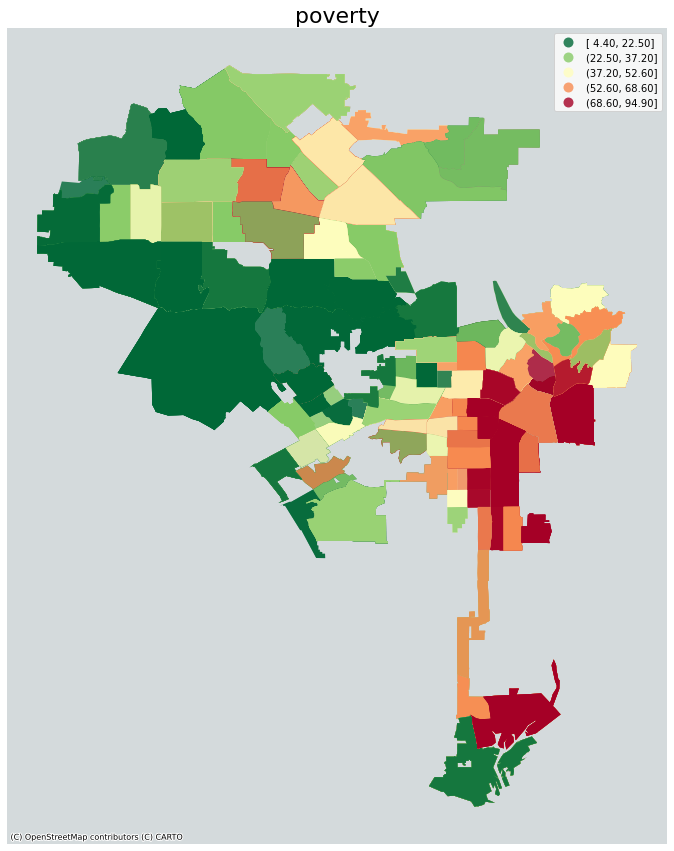

In [32]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# spatial lag choropleth
ok.plot(ax=ax,
         figsize=(15,15),
         column='poverty',
         legend=True,
         alpha=0.8,
         cmap='RdYlGn_r',
         scheme='NaturalBreaks')

# uncomment this to see the actual point locations of arrests
# arrests.plot(ax=ax, 
#              color='blue',
#              markersize =1,
#              alpha=0.2, 
#              legend=True)

ax.axis('off')
ax.set_title('poverty',fontsize=22)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

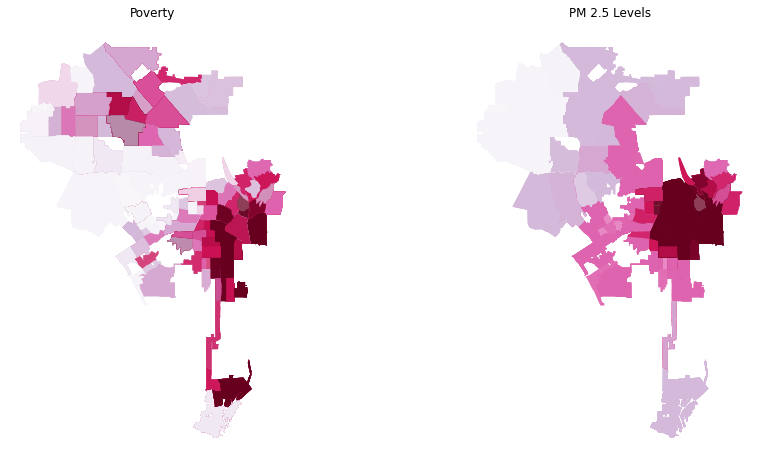

In [33]:
# create the 1x2 subplots
# 1, 2 --> 2 maps side by side on 1 row. if did 3 it would be 3 maps side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
ok.plot(column='poverty', 
            cmap='PuRd', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1 # this assigns the map to the subplot
           )


ax1.axis("off")
ax1.set_title("Poverty")

# spatial lag map on the right
ok.plot(column='pm25', 
            cmap='PuRd', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2 # this assigns the map to the subplot
           )

ax2.axis("off")
ax2.set_title("PM 2.5 Levels")

plt.show()

#good for before and after
#not on same scale tho

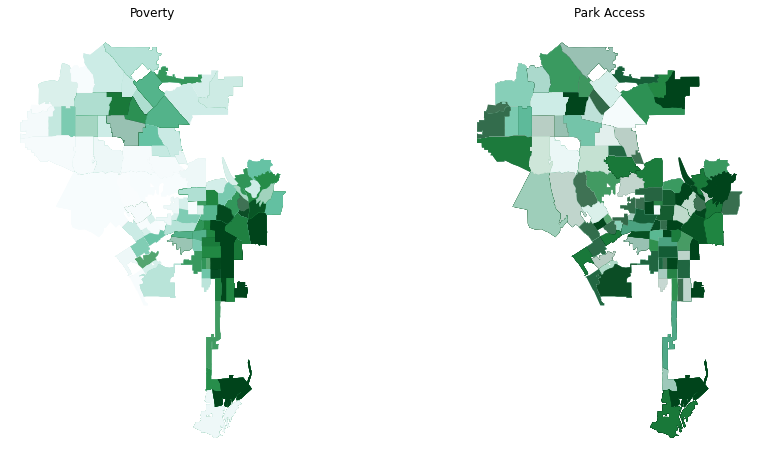

In [34]:
# create the 1x2 subplots
# 1, 2 --> 2 maps side by side on 1 row. if did 3 it would be 3 maps side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
ok.plot(column='poverty', 
            cmap='BuGn', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1 # this assigns the map to the subplot
           )


ax1.axis("off")
ax1.set_title("Poverty")

# spatial lag map on the right
ok.plot(column='parkaccess', 
            cmap='BuGn', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2 # this assigns the map to the subplot
           )

ax2.axis("off")
ax2.set_title("Park Access")

plt.show()

#good for before and after
#not on same scale tho

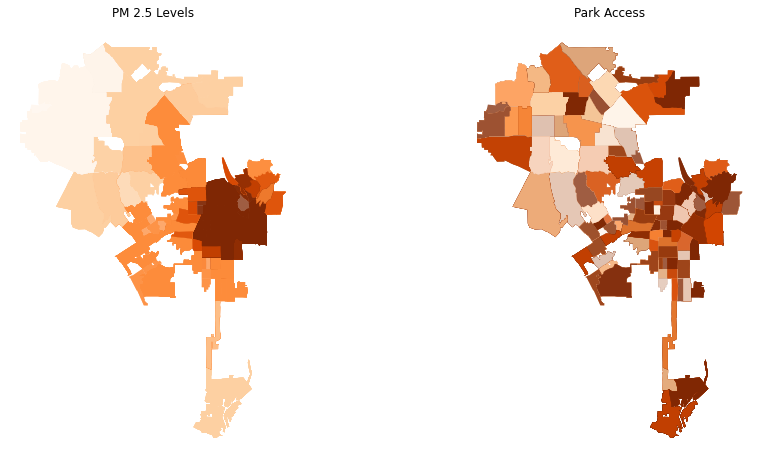

In [35]:
# create the 1x2 subplots
# 1, 2 --> 2 maps side by side on 1 row. if did 3 it would be 3 maps side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
ok.plot(column='pm25', 
            cmap='Oranges', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1 # this assigns the map to the subplot
           )


ax1.axis("off")
ax1.set_title("PM 2.5 Levels")

# spatial lag map on the right
ok.plot(column='parkaccess', 
            cmap='Oranges', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2 # this assigns the map to the subplot
           )

ax2.axis("off")
ax2.set_title("Park Access")

plt.show()

#good for before and after
#not on same scale tho

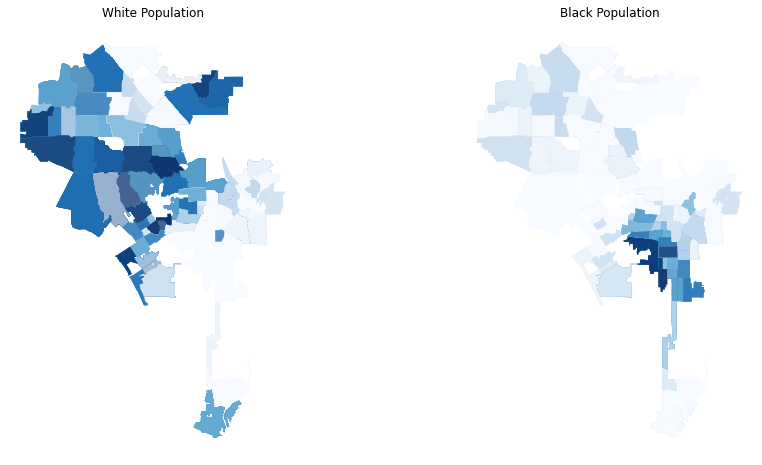

In [46]:
# create the 1x2 subplots
# 1, 2 --> 2 maps side by side on 1 row. if did 3 it would be 3 maps side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
ok.plot(column='white', 
            cmap='Blues', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1 # this assigns the map to the subplot
           )


ax1.axis("off")
ax1.set_title("White Population")

# spatial lag map on the right
ok.plot(column='black', 
            cmap='Blues', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2 # this assigns the map to the subplot
           )

ax2.axis("off")
ax2.set_title("Black Population")

plt.show()

#good for before and after
#not on same scale tho

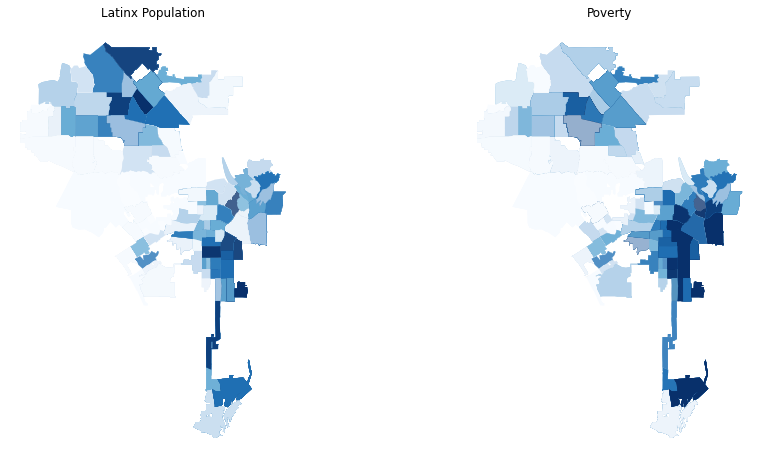

In [47]:
# create the 1x2 subplots
# 1, 2 --> 2 maps side by side on 1 row. if did 3 it would be 3 maps side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
ok.plot(column='latinx', 
            cmap='Blues', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1 # this assigns the map to the subplot
           )


ax1.axis("off")
ax1.set_title("Latinx Population")

# spatial lag map on the right
ok.plot(column='poverty', 
            cmap='Blues', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2 # this assigns the map to the subplot
           )

ax2.axis("off")
ax2.set_title("Poverty")

plt.show()

#good for before and after
#not on same scale tho

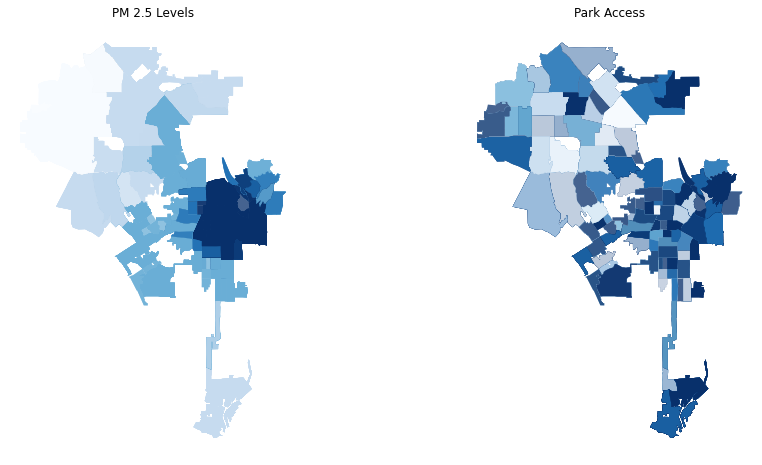

In [48]:
# create the 1x2 subplots
# 1, 2 --> 2 maps side by side on 1 row. if did 3 it would be 3 maps side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
ok.plot(column='pm25', 
            cmap='Blues', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1 # this assigns the map to the subplot
           )


ax1.axis("off")
ax1.set_title("PM 2.5 Levels")

# spatial lag map on the right
ok.plot(column='parkaccess', 
            cmap='Blues', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2 # this assigns the map to the subplot
           )

ax2.axis("off")
ax2.set_title("Park Access")

plt.show()

#good for before and after
#not on same scale tho

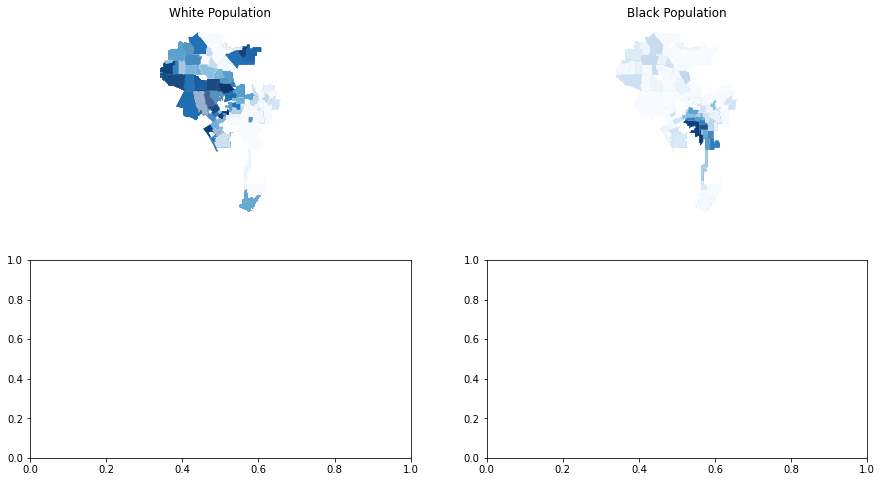

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [64]:
# create the 1x2 subplots
# 1, 2 --> 2 maps side by side on 1 row. if did 3 it would be 3 maps side by side
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))

# regular count map on the left
ok.plot(column='white', 
            cmap='Blues', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1 # this assigns the map to the subplot
           )


ax1.axis("off")
ax1.set_title("White Population")

# spatial lag map on the right
ok.plot(column='black', 
            cmap='Blues', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2 # this assigns the map to the subplot
           )

ax2.axis("off")
ax2.set_title("Black Population")

plt.show()

#good for before and after
#not on same scale tho

# spatial lag map on the right
ok.plot(column='pm25', 
            cmap='Blues', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax3 # this assigns the map to the subplot
           )

ax3.axis("off")
ax3.set_title("Latinx Population")

plt.show()

#good for before and after
#not on same scale tho

# spatial lag map on the right
ok.plot(column='parkaccess', 
            cmap='Blues', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax4 # this assigns the map to the subplot
           )

ax4.axis("off")
ax4.set_title("Poverty")

plt.show()

#good for before and after
#not on same scale tho